In [5]:
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
#print(sys.path)


from components.serv_times.userv_function import StaticUServiceTime
from numpy import linspace,logspace,meshgrid,arange

# List of library fracs
lib_range = linspace(0,1,20)

# List of function working sets to plot
#func_wset_range = logspace(start=4,stop=16,base=2,num=13)
func_wset_range = arange(10,100,10)

# List of number of functions
num_func_range = linspace(1,16,16)

# List of parameters to sweep
gx,gy = meshgrid(lib_range,num_func_range)
#param_iterator = ((lfrac,wset) for lfrac in lib_range for wset in func_wset_range)
#print(gx,gy)

In [14]:
num_funcs_test = 16
lfrac = 0.25
wset = 40 * 1024
wset = wset * (1-lfrac)
# calculate func thrashing boundary
num_insts = wset/4
num_branches = num_insts/5
from math import floor
funcs_per_btb = floor(6*1024 / float(num_branches))
stime_affinity = StaticUServiceTime(wset,num_functions=funcs_per_btb,
                                  func_thrashing_boundary=funcs_per_btb,library_fraction=lfrac) # Value of nfuncs being tested
stime_thrashing = StaticUServiceTime(wset,num_functions=num_funcs_test,
                                   func_thrashing_boundary=funcs_per_btb,library_fraction=lfrac) # All other values give thrashing

print('Base service time',stime_thrashing.get())
print('Static affinity grouping',funcs_per_btb)
print('Affinity service time',stime_affinity.get())

Base service time 7136.0
Static affinity grouping 4
Affinity service time 3200.0


Figure already exists with fname affinity_throughput_boost_10KB.pdf will back up!
Figure already exists with fname affinity_throughput_boost_20KB.pdf will back up!
Figure already exists with fname affinity_throughput_boost_30KB.pdf will back up!
Figure already exists with fname affinity_throughput_boost_40KB.pdf will back up!
Figure already exists with fname affinity_throughput_boost_50KB.pdf will back up!
Figure already exists with fname affinity_throughput_boost_60KB.pdf will back up!
Figure already exists with fname affinity_throughput_boost_70KB.pdf will back up!
Figure already exists with fname affinity_throughput_boost_80KB.pdf will back up!
Figure already exists with fname affinity_throughput_boost_90KB.pdf will back up!


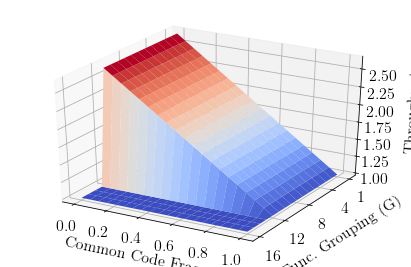

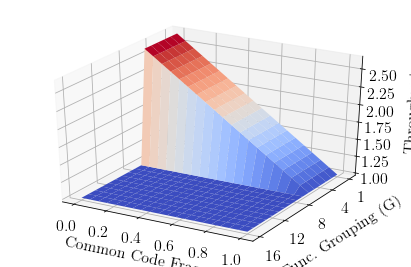

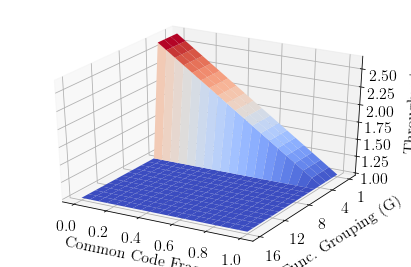

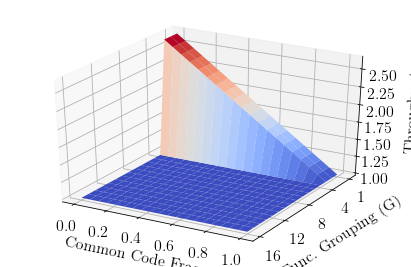

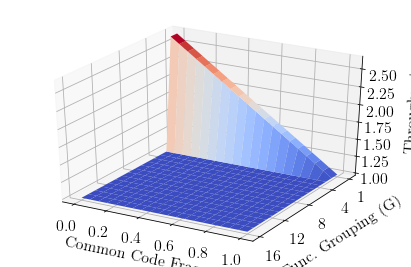

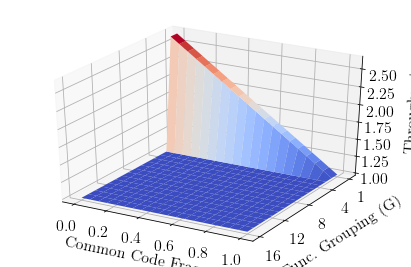

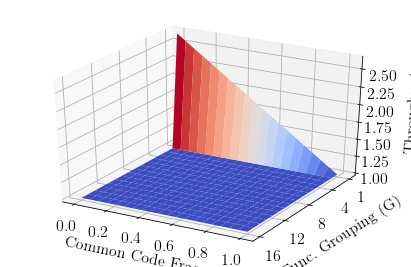

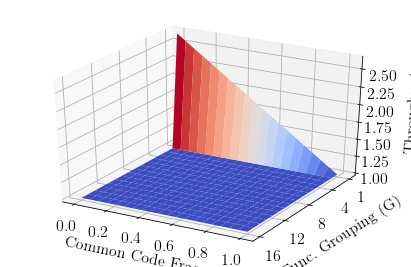

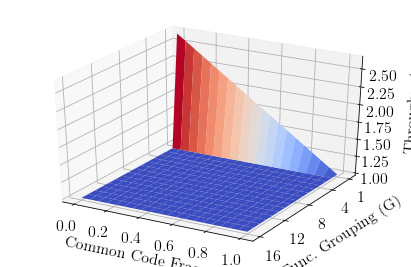

In [39]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib import rc,cm
from matplotlib.backends.backend_pdf import PdfPages

### Create the data
def get_throughput_boost(lfrac,wset,nfuncs):
    wset = wset * 1024
    # calculate func thrashing boundary
    num_insts = wset/4
    num_branches = num_insts/5
    from math import floor
    funcs_per_btb = floor(6*1024 / float(num_branches))
    
    stime_affinity = uServiceFunctionTime(wset,num_functions=nfuncs,
                                          func_thrashing_boundary=funcs_per_btb,library_fraction=lfrac) # Value of nfuncs being tested
    stime_thrashing = uServiceFunctionTime(wset,num_functions=funcs_per_btb+1,
                                           func_thrashing_boundary=funcs_per_btb,library_fraction=lfrac) # All other values give thrashing
    
    benefit = float(stime_thrashing.get())/stime_affinity.get()
    return benefit
    
get_throughput_boost(0.5,20*1024,5)
get_throughput_boost(0.5,64*1024,10)
get_throughput_boost(0.8,20*1024,1)

### Create a list of data points for each workset
def make_output(lrange,nfuncs,code_size):
    output = [[get_throughput_boost(l,code_size,n) for l in lrange] for n in nfuncs]
    return output

# Generate plots
fontdir = {'size':16,'family':'serif'}
rc('font',**fontdir)
rc('text',usetex=True)
for x in func_wset_range:
    plotme = np.array(make_output(lib_range,num_func_range,x))
    fname = 'affinity_throughput_boost_'+str(x)+'KB.pdf'
    if os.path.exists(fname):
        print('Figure already exists with fname',fname,'will back up!')
        fname_bak = fname + '.bak'
        os.rename(fname,fname_bak)


    with PdfPages(fname) as pp:
        fig = plt.figure()
        ax = fig.add_subplot(111,projection='3d')
        surf = ax.plot_surface(gx,gy,plotme,cmap=cm.coolwarm)
        #for series,vals in plotme.items():
            #slabel = str(series) + "KB"
            #ax.plot(lib_range,vals,label=slabel)

        ax.set_yticks([1,4,8,12,16])
        ax.invert_yaxis()
        ax.set_xlabel("Common Code Frac.",labelpad=10)
        ax.set_ylabel("Func. Grouping (G)",labelpad=10)
        ax.set_zlabel("Throughput",labelpad=10)

        fig.tight_layout()
        pp.savefig()
    